In [ ]:
import pandas as pd
import numpy as np
import json
import pickle

In [198]:
#Loading datasets

measures_per_country = pd.read_csv("./static_datasets/acaps_covid19_government_measures_dataset_updated.csv")
active_cases = pd.read_csv("./static_datasets/country_timeseries_data_newer.csv") #global timeseries data

#country level data
#uki_data = pd.read_csv("./static_datasets/country_timeseries_data_uki.csv")
#italy_data = pd.read_csv("./static_datasets/country_timeseries_data_italy.csv")
#spain_data = pd.read_csv("./static_datasets/country_timeseries_data_spain.csv")
#australia_data = pd.read_csv("./static_datasets/country_timeseries_data_australia.csv")
#france_data = pd.read_csv("./static_datasets/country_timeseries_data_france.csv")
#germany_data = pd.read_csv("./static_datasets/country_timeseries_data_germany.csv")
#nz_data = pd.read_csv("./static_datasets/country_timeseries_data_new_zealand.csv")
#sweden_data = pd.read_csv("./static_datasets/country_timeseries_data_sweden.csv")
ireland_data = pd.read_csv("./static_datasets/country_timeseries_data_ireland.csv")
uk_data = pd.read_csv("./static_datasets/country_timeseries_data_uk.csv")


In [199]:
#for easier referencing the data
country_data_container = {}
#country_data_container["uki"] = uki_data
#country_data_container["italy"] = italy_data
#country_data_container["spain"] = spain_data
#country_data_container["australia"] = australia_data
#country_data_container["france"] = france_data
#country_data_container["germany"] = germany_data
#country_data_container["nz"] = nz_data
#country_data_container["sweden"] = sweden_data
country_data_container["ireland"] = ireland_data
country_data_container["uk"] = uk_data

### Data investigation and pre-processing

In [200]:
measures_per_country.columns = measures_per_country.columns.str.lower() #we'll use lower case name for columns
measures_per_country.drop(measures_per_country.index[15940:], inplace=True) #dropping dirty data containing only nulls from end

In [201]:
measures_per_country.measure.unique()

array(['Health screenings in airports and border crossings',
       'Isolation and quarantine policies', 'Awareness campaigns',
       'Emergency administrative structures activated or established',
       'Limit public gatherings', 'Border closure\xa0',
       'Schools closure\xa0', 'Strengthening the public health system',
       'Limit product imports/exports', 'Border checks\xa0',
       'International flights suspension', 'Surveillance and monitoring',
       'Other public health measures enforced',
       'Domestic travel restrictions', 'State of emergency declared',
       'General recommendations', 'Partial lockdown',
       'Changes in prison-related policies',
       'Checkpoints within the country', 'Economic measures', 'Curfews',
       'Closure of businesses and public services', 'Military deployment',
       'Visa restrictions',
       'Requirement to wear protective gear in public', 'Full lockdown',
       'Lockdown of refugee/idp camps or other minorities',
       'Addi

In [202]:
m_l = []
for m in measures_per_country.measure.unique():
    unistring = m.replace("\xa0", "")
    m_l.append(unistring)


In [203]:
with open('all_measures.json', 'w') as json_file:
    json.dump(m_l, json_file)

In [204]:
active_cases.loc[active_cases["CountryName"] == "Israel"].head(20) #just taking a look

,UpdateId,CountryId,CountryName,CountryCode,Province,City,Latitude,Longitude,ConfirmedCases,ActiveCases,Deaths,Recovered,DateTime,CountriesCountryId,ChangeInActiveCases
0,1,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,22/01/2020,NaN,0
1,2,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,23/01/2020,NaN,0
2,3,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,24/01/2020,NaN,0
3,4,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,25/01/2020,NaN,0
4,5,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,26/01/2020,NaN,0
5,6,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,27/01/2020,NaN,0
6,7,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,28/01/2020,NaN,0
7,8,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,29/01/2020,NaN,0
8,9,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,30/01/2020,NaN,0
9,10,1,Israel,IL,NaN,NaN,31.05,34.85,0,0,0,0,31/01/2020,NaN,0


In [205]:
def convert_datetime(data, data_column_name, day_first=True):
    data[data_column_name] = pd.to_datetime(data[data_column_name], dayfirst = day_first)

In [206]:
for key in country_data_container:
    convert_datetime(country_data_container[key], "DateTime")

convert_datetime(measures_per_country, "date_implemented")
convert_datetime(active_cases, "DateTime")

In [207]:
#active_cases.head(50)
#uki_data.head()
#country_data_container["sweden"].head()


In [208]:
measures_per_country.head()

,id,country,iso,admin_level_name,pcode,region,log_type,category,measure,targeted_pop_group,comments,non_compliance,date_implemented,source,source_type,link,entry_date,alternative source,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22
0,1.0,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,14/03/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
measures_per_country.head()

measurecount_per_country = measures_per_country["country"].value_counts()

In [210]:
measurecount_per_country["Sri Lanka"]

285

#### Constructing cumulative number of measures by country

In [211]:
measures = measures_per_country[["country", "measure", "date_implemented"]]

measure_counts = measures.groupby(["country", "date_implemented"])

In [212]:
measure_counts.size()

country      date_implemented
Afghanistan  2020-01-24          1
             2020-01-26          1
             2020-01-27          2
             2020-02-01          1
             2020-02-02          2
                                ..
Zimbabwe     2020-05-17          3
             2020-05-21          1
             2020-06-09          2
             2020-06-30          1
             2020-07-28          1
Length: 7148, dtype: int64

In [213]:
measure_counts_by_date = pd.DataFrame(columns = ["country", "date_implemented", "number_of_measures"])

In [214]:
for name, group in measure_counts:
    measure_counts_by_date = measure_counts_by_date.append({"country": name[0], "date_implemented": name[1], "number_of_measures": group.measure.size}, ignore_index=True)
    

In [215]:
measure_counts_by_date.sort_values(["country", "date_implemented"]).head(20)

,country,date_implemented,number_of_measures
0,Afghanistan,2020-01-24,1
1,Afghanistan,2020-01-26,1
2,Afghanistan,2020-01-27,2
3,Afghanistan,2020-02-01,1
4,Afghanistan,2020-02-02,2
5,Afghanistan,2020-02-04,2
6,Afghanistan,2020-02-06,1
7,Afghanistan,2020-02-08,1
8,Afghanistan,2020-02-12,5
9,Afghanistan,2020-02-13,1


In [216]:
measure_counts_by_date["cumulative_num_of_measures"] = measure_counts_by_date.groupby(["country"])["number_of_measures"].apply(lambda x: x.cumsum())

In [217]:
active_cases_by_date_by_country = {}

for key in country_data_container:
     active_cases_by_date_by_country[key] = country_data_container[key][["CountryId", "CountryName", "ActiveCases", "DateTime", "ChangeInActiveCases"]]

In [218]:
#active_cases_by_date = active_cases[["CountryId", "CountryName", "ActiveCases", "DateTime", "ChangeInActiveCases"]]
#active_cases_by_date = uki_data[["CountryId", "CountryName", "ActiveCases", "DateTime", "ChangeInActiveCases"]]

In [219]:
#active_cases_by_date.loc[active_cases_by_date["CountryName"] == "United Kingdom"]
#active_cases_by_date.loc[active_cases_by_date["CountryName"] == "Ireland"]

In [220]:
from datetime import datetime

def find_num_of_measures(cases_row):
    relevant_country = measure_counts_by_date.loc[measure_counts_by_date["country"] == cases_row.CountryName]

    if relevant_country.empty:
        return 0
    
    measures_implemented = relevant_country.loc[relevant_country["date_implemented"] <= cases_row.DateTime].max().iloc[3]
    
    if np.isnan(measures_implemented):
        return 0
    
    return measures_implemented


In [221]:
#active_cases_by_date = active_cases_by_date.drop(["implemented_measures"], axis=1)
for key in active_cases_by_date_by_country:
    current_country = active_cases_by_date_by_country[key]
    cases = current_country.apply(lambda row: find_num_of_measures(row), axis=1)
    current_country["implemented_measures"] = cases
    

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [222]:
#active_cases_by_date_by_country["spain"]

In [223]:
categorical_feature_mask = measures.dtypes == object

categorical_cols = measures.columns[categorical_feature_mask].tolist()

In [224]:
categorical_cols

['country', 'measure']

In [225]:
measures_per_country['category'].astype('category')

0                        Public health measures
1                        Public health measures
2                        Public health measures
3        Governance and socio-economic measures
4                             Social distancing
                          ...                  
15935                         Social distancing
15936                     Movement restrictions
15937                         Social distancing
15938                     Movement restrictions
15939                         Social distancing
Name: category, Length: 15940, dtype: category
Categories (6, object): [Governance and socio-economic measures, Humanitarian exemption, Lockdown, Movement restrictions, Public health measures, Social distancing]

In [226]:
measures = measures_per_country[["country", "measure"]]

In [227]:
measures.dtypes

country    object
measure    object
dtype: object

In [228]:
measures["measure"] = measures["measure"].astype('category')

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
measures.dtypes

measures["measure_cats"] = measures["measure"].cat.codes

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [230]:
measures.head()

,country,measure,measure_cats
0,Afghanistan,Health screenings in airports and border cross...,15
1,Afghanistan,Isolation and quarantine policies,18
2,Afghanistan,Awareness campaigns,2
3,Afghanistan,Emergency administrative structures activated ...,12
4,Afghanistan,Limit public gatherings,20


In [231]:
measures.loc[measures['measure_cats'] == 0]

,country,measure,measure_cats
241,Angola,Additional health/documents requirements upon ...,0
435,Antigua and Barbuda,Additional health/documents requirements upon ...,0
459,Antigua and Barbuda,Additional health/documents requirements upon ...,0
895,Austria,Additional health/documents requirements upon ...,0
1209,Bahamas,Additional health/documents requirements upon ...,0
...,...,...,...
15749,Viet Nam,Additional health/documents requirements upon ...,0
15771,Viet Nam,Additional health/documents requirements upon ...,0
15780,Viet Nam,Additional health/documents requirements upon ...,0
15781,Viet Nam,Additional health/documents requirements upon ...,0


In [232]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

In [233]:
#measures['measure_label'] = le.fit_transform(measures['measure'])

In [234]:
measures.head()

,country,measure,measure_cats
0,Afghanistan,Health screenings in airports and border cross...,15
1,Afghanistan,Isolation and quarantine policies,18
2,Afghanistan,Awareness campaigns,2
3,Afghanistan,Emergency administrative structures activated ...,12
4,Afghanistan,Limit public gatherings,20


In [235]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])],remainder = 'passthrough')

In [236]:
measures.head()
#measures.drop("measure", axis =1)

,country,measure,measure_cats
0,Afghanistan,Health screenings in airports and border cross...,15
1,Afghanistan,Isolation and quarantine policies,18
2,Afghanistan,Awareness campaigns,2
3,Afghanistan,Emergency administrative structures activated ...,12
4,Afghanistan,Limit public gatherings,20


## Time series analysis

In [237]:
from statsmodels.tsa import stattools

In [238]:
#gc_res = stattools.grangercausalitytests(causality_test_data, 4)

In [239]:
from statsmodels.tsa.stattools import adfuller

In [240]:
def run_adfuller(df, column_name):
    
    df_trans = df[[column_name]].values.squeeze()
    result = adfuller(df_trans)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [242]:
#aus = active_cases_by_date_by_country["australia"]

#aus["ChangeInActiveCases"]

In [243]:
#del active_cases_by_date_by_country['australia'] #temp - TODO - Australia data is only up until June
#TODO this will be need to be cleaned
def run_adfuller_for_countries(country_dict, test_for):

    for key in country_dict:

        print("Running adfuller test for ", key)
        current_country = country_dict[key]

        #TODO this is very hacky
        if key == 'uki':
            current_country = current_country.loc[current_country["CountryName"] == "Ireland"]
            run_adfuller(current_country, test_for)
            uk =  active_cases_by_date_by_country[key]
            uk = uk.loc[uk["CountryName"] == "United Kingdom"]
            run_adfuller(uk, test_for)
        else:
            run_adfuller(current_country, test_for)

run_adfuller_for_countries(active_cases_by_date_by_country, "ChangeInActiveCases")


Running adfuller test for  ireland
ADF Statistic: -2.015078
p-value: 0.280001
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Running adfuller test for  uk
ADF Statistic: -1.649090
p-value: 0.457515
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


ireland
uk


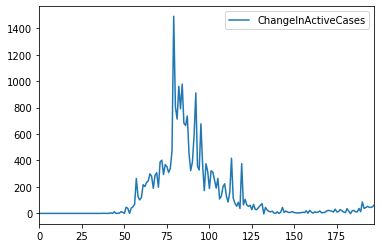

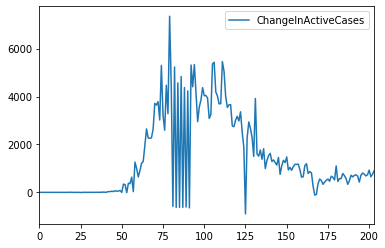

In [244]:
import matplotlib.pyplot as plt
#active_cases_by_date[["ChangeInActiveCases"]].plot()
#uk_stat_active_cases_by_date[["ChangeInActiveCases"]].plot()
for key in active_cases_by_date_by_country:
    print(key)
    country = active_cases_by_date_by_country[key]
    if key != 'uki':
        country[["ChangeInActiveCases"]].plot()
    else:
        ir = country.loc[country["CountryName"] == 'Ireland']
        uk = country.loc[country["CountryName"] == 'United Kingdom']
        print("Ireland")
        ir[["ChangeInActiveCases"]].plot()
        print("United Kingdom")
        uk[["ChangeInActiveCases"]].plot()
    
#ir_stat_active_cases_by_date[["ChangeInActiveCases"]].plot()
plt.show()

In [245]:
run_adfuller_for_countries(active_cases_by_date_by_country, "implemented_measures")

Running adfuller test for  ireland
ADF Statistic: -0.409006
p-value: 0.908584
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Running adfuller test for  uk
ADF Statistic: 0.228933
p-value: 0.973838
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


In [246]:
#result_measures = adfuller(ireland_stat_measures)

NameError: name 'ireland_stat_measures' is not defined

In [247]:
print('ADF Statistic: %f' % result_measures[0])
print('p-value: %f' % result_measures[1])
print('Critical Values:')
for key, value in result_measures[4].items():
	print('\t%s: %.3f' % (key, value))

NameError: name 'result_measures' is not defined

In [248]:
causality_test_data_by_country = {}

for key in active_cases_by_date_by_country:
    
    current_country = active_cases_by_date_by_country[key]
    if key == 'uki':
        ir = current_country.loc[current_country["CountryName"] == "Ireland"]
        uk = current_country.loc[current_country["CountryName"] == "United Kingdom"]
        causality_ir = ir[["ChangeInActiveCases", "implemented_measures"]].pct_change().replace([np.inf, -np.inf], np.nan).dropna()
        causality_uk = uk[["ChangeInActiveCases", "implemented_measures"]].pct_change().replace([np.inf, -np.inf], np.nan).dropna()
        causality_test_data_by_country["ireland"] = causality_ir
        causality_test_data_by_country["uk"] = causality_uk
    else:
        ctd = current_country[["ChangeInActiveCases", "implemented_measures"]].pct_change().replace([np.inf, -np.inf], np.nan).dropna()
        causality_test_data_by_country[key] = ctd


In [249]:
causality_test_data

NameError: name 'causality_test_data' is not defined

In [250]:
run_adfuller(causality_test_data, "ChangeInActiveCases")

NameError: name 'causality_test_data' is not defined

In [251]:
run_adfuller(causality_test_data, "implemented_measures")

NameError: name 'causality_test_data' is not defined

In [252]:
print(causality_test_data_by_country)

{'ireland':      ChangeInActiveCases  implemented_measures
52             -0.191489              0.000000
53             -1.000000              0.333333
55              0.225000              0.000000
56              0.408163              0.200000
57              2.826087              0.000000
..                   ...                   ...
193             0.204545              0.000000
194            -0.132075              0.000000
195            -0.021739              0.000000
196             0.111111              0.000000
197             0.280000              0.000000

[144 rows x 2 columns], 'uk':      ChangeInActiveCases  implemented_measures
50             -1.026667                   0.0
51           -172.000000                   1.0
52             -0.052632                   0.0
53             -1.043210                   0.0
54            -28.214286                   2.5
..                   ...                   ...
199             0.069869                   0.0
200             0

In [253]:
for ckey in causality_test_data_by_country:
    
    gc_res = stattools.grangercausalitytests(causality_test_data_by_country[ckey], 30)
    gc_result = {}
    for key in gc_res:
        key_ = "lag" + str(key)
        test_result = {}
        test_result['chi2test'] = (gc_res[key][0]['ssr_chi2test'][0], gc_res[key][0]['ssr_chi2test'][1])
        test_result['lrtest'] = (gc_res[key][0]['lrtest'][0], gc_res[key][0]['lrtest'][1])
        gc_result[key_] = test_result
    file_name = str(ckey) + "_policy_grangerstats.json"
    with open(file_name, 'w') as json_file:
        json.dump(gc_result, json_file)

    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9913  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9912  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9912  , df=1
parameter F test:         F=0.0001  , p=0.9913  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0132  , p=0.9868  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=0.0275  , p=0.9864  , df=2
likelihood ratio test: chi2=0.0275  , p=0.9864  , df=2
parameter F test:         F=0.0132  , p=0.9868  , df_denom=137, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0082  , p=0.9990  , df_denom=134, df_num=3
ssr based chi2 test:   chi2=0.0259  , p=0.9989  , df=3
likelihood ratio test: chi2=0.0259  , p=0.9989  , df=3
parameter F test:         F=0.0082  , p=0.9990  , df_denom=134, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0067  , p=0.9999  

ssr based F test:         F=0.6842  , p=0.7855  , df_denom=111, df_num=14
ssr based chi2 test:   chi2=12.0819 , p=0.5997  , df=14
likelihood ratio test: chi2=11.5887 , p=0.6393  , df=14
parameter F test:         F=0.6842  , p=0.7855  , df_denom=111, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=0.6971  , p=0.7825  , df_denom=108, df_num=15
ssr based chi2 test:   chi2=13.4579 , p=0.5670  , df=15
likelihood ratio test: chi2=12.8457 , p=0.6142  , df=15
parameter F test:         F=0.6971  , p=0.7825  , df_denom=108, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=0.9047  , p=0.5657  , df_denom=105, df_num=16
ssr based chi2 test:   chi2=19.0249 , p=0.2674  , df=16
likelihood ratio test: chi2=17.8228 , p=0.3344  , df=16
parameter F test:         F=0.9047  , p=0.5657  , df_denom=105, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=0.9163  , p=0.5570  , df_denom=102, df_num=17
ssr b

#TODO run model to get predictions

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#uk = uk_stat_active_cases_by_date #.loc[uk_stat_active_cases_by_date["CountryName"] == "Israel"]
ir = ir_stat_active_cases_by_date #.loc[uk_stat_active_cases_by_date["CountryName"] == "Israel"]

In [289]:
active_cases_by_date_by_country["ireland"]

,CountryId,CountryName,ActiveCases,DateTime,ChangeInActiveCases,implemented_measures
0,237,Ireland,0,2020-01-22,0,0
1,237,Ireland,0,2020-01-23,0,0
2,237,Ireland,0,2020-01-24,0,0
3,237,Ireland,0,2020-01-25,0,0
4,237,Ireland,0,2020-01-26,0,0
...,...,...,...,...,...,...
193,237,Ireland,1035,2020-08-02,53,91
194,237,Ireland,1081,2020-08-03,46,91
195,237,Ireland,1126,2020-08-04,45,91
196,237,Ireland,1176,2020-08-05,50,91


In [ ]:
train_days = ir.iloc[:158]

In [ ]:
train_days["ChangeInActiveCases"].plot()

In [ ]:
from scipy import stats
#TODO remove outliers
#train_days[(np.abs(stats.zscore(train_days)) < 3).all(axis=1)]

In [174]:
test_days = ir.iloc[159:]

In [175]:
#test_days.at[357, "ChangeInActiveCases"] = (test_days.at[356, "ChangeInActiveCases"] + test_days.at[358, "ChangeInActiveCases"]) /2

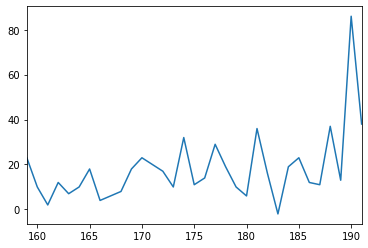

In [176]:
test_days["ChangeInActiveCases"].plot()

In [177]:
X_train =  [i for i in range(0, len(train_days.index))]
X_train = np.array(X_train).reshape(-1,1)

test_start = len(train_days.index) + 1
X_test =  [i for i in range(test_start, test_start + len(test_days.index))]
X_test = np.array(X_test).reshape(-1,1)

In [178]:

#num_measures_transformed = uk["implemented_measures"].values.reshape(-1,1)
num_measures_transformed = ir["implemented_measures"].values.reshape(-1,1)
nmt_train = num_measures_transformed[:158]

In [179]:
y_train = train_days['ChangeInActiveCases'].to_numpy().reshape(-1,1)
y_test = test_days['ChangeInActiveCases'].to_numpy().reshape(-1,1)
#y_confirmed = sa_data['ConfirmedCases'].to_numpy().reshape(-1,1)
#y_deaths = sa_data['Deaths'].to_numpy().reshape(-1,1)

In [180]:
X_train = np.concatenate((X_train,nmt_train), axis = 1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [181]:
X_train.shape

(159, 1)

In [182]:
X_train

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [183]:
nmt_test = num_measures_transformed[159:]

In [ ]:

kernel = ['poly']
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1]
epsilon = [0.01, 0.1]
shrinking = [True]
svm_grid = {'kernel': kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error' , cv= 3)

In [ ]:
svm_search.fit(X_train, y_train)

In [ ]:
svm_search.best_params_

In [ ]:
svm_estimator = svm_search.best_estimator_

In [ ]:
X_test = np.concatenate((X_test, nmt_test), axis = 1 )

In [ ]:
#X_test = np.delete(X_test, -1, axis=1)

In [ ]:
X_test.shape, nmt_test.shape

In [ ]:
predictions = svm_estimator.predict(X_test)

In [ ]:
type(predictions)

In [ ]:
pd.Series(predictions).plot()

In [ ]:
pd.Series(y_test.ravel()).plot()

In [ ]:
#import pickle

In [ ]:
#pickle.dump(svm_estimator, open("ireland_change_estimator", 'wb'))

## Getting feature importances

In [254]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
measures_ = measures_per_country[["country", "measure", "date_implemented"]]

In [255]:
measures_per_country.iloc[15940:]

,id,country,iso,admin_level_name,pcode,region,log_type,category,measure,targeted_pop_group,comments,non_compliance,date_implemented,source,source_type,link,entry_date,alternative source,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22


In [256]:
measures_.head()

,country,measure,date_implemented
0,Afghanistan,Health screenings in airports and border cross...,2020-02-12
1,Afghanistan,Isolation and quarantine policies,2020-02-12
2,Afghanistan,Awareness campaigns,2020-02-12
3,Afghanistan,Emergency administrative structures activated ...,2020-02-12
4,Afghanistan,Limit public gatherings,2020-03-12


In [257]:
measures_["measure_category"] = measures["measure"].astype('category')

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [258]:
#measures_

In [259]:
measures_.dtypes

country                     object
measure                     object
date_implemented    datetime64[ns]
measure_category          category
dtype: object

In [260]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [261]:
#measures_['measure_labels'] = le.fit_transform(measures_['measure_category'])
measures_['measure_labels'] = measures_['measure_category'].cat.codes

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [262]:
measures_

,country,measure,date_implemented,measure_category,measure_labels
0,Afghanistan,Health screenings in airports and border cross...,2020-02-12,Health screenings in airports and border cross...,15
1,Afghanistan,Isolation and quarantine policies,2020-02-12,Isolation and quarantine policies,18
2,Afghanistan,Awareness campaigns,2020-02-12,Awareness campaigns,2
3,Afghanistan,Emergency administrative structures activated ...,2020-02-12,Emergency administrative structures activated ...,12
4,Afghanistan,Limit public gatherings,2020-03-12,Limit public gatherings,20
...,...,...,...,...,...
15935,Zimbabwe,Limit public gatherings,2020-05-17,Limit public gatherings,20
15936,Zimbabwe,Surveillance and monitoring,2020-06-09,Surveillance and monitoring,32
15937,Zimbabwe,Schools closure,2020-07-28,Schools closure,29
15938,Zimbabwe,Surveillance and monitoring,2020-06-09,Surveillance and monitoring,32


In [263]:
df = pd.get_dummies(measures_["measure_labels"])

In [264]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [265]:
measures_by_country_be = measures_.join(pd.get_dummies(measures_["measure_labels"]))

In [266]:
test.loc[test.date_implemented == '2020-02-12']

test.dtypes

country                     object
measure                     object
date_implemented    datetime64[ns]
measure_category          category
measure_labels                int8
0                            uint8
1                            uint8
2                            uint8
3                            uint8
4                            uint8
5                            uint8
6                            uint8
7                            uint8
8                            uint8
9                            uint8
10                           uint8
11                           uint8
12                           uint8
13                           uint8
14                           uint8
15                           uint8
16                           uint8
17                           uint8
18                           uint8
19                           uint8
20                           uint8
21                           uint8
22                           uint8
23                  

In [267]:
measure_group_result = pd.DataFrame(columns=["country", "date_implemented"])

for group, data in measures_by_country_be.groupby(["country", "date_implemented"]):
    row = pd.DataFrame(columns = ["country", "date_implemented"])
    row = row.append([{"country": group[0], "date_implemented": group[1]}])
    sum_result = data.iloc[:, 6:].sum(axis=0).to_frame().T
    
    row = pd.concat([row, sum_result], axis=1)
    #print(row)
    measure_group_result = measure_group_result.append(row)

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [268]:
#pd.set_option('display.max_columns', None)
measure_group_result.head()

,country,date_implemented,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,Afghanistan,2020-01-24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Afghanistan,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Afghanistan,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Afghanistan,2020-02-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Afghanistan,2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
aggregated_measures = measure_group_result.groupby(["country", "date_implemented"]).sum().groupby(level=0).cumsum().reset_index()

In [270]:
(aggregated_measures.iloc[:, 2:] > 0).astype(int)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0
7144,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0
7145,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0
7146,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0


In [271]:
aggregated_measures.iloc[:, 2:] = (aggregated_measures.iloc[:, 2:] > 0).astype(int)

In [272]:
aggregated_measures.head()

,country,date_implemented,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,Afghanistan,2020-01-24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,2020-01-26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,2020-01-27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,2020-02-01,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,2020-02-02,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [155]:
aggregated_mesures_by_country = {}   


In [273]:
aggregated_measures.loc[aggregated_measures['country'] == 'United Kingdom']

,country,date_implemented,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
6792,United Kingdom,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6793,United Kingdom,2020-03-13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6794,United Kingdom,2020-03-16,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6795,United Kingdom,2020-03-18,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6796,United Kingdom,2020-03-20,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6797,United Kingdom,2020-03-21,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6798,United Kingdom,2020-03-22,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6799,United Kingdom,2020-03-23,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6800,United Kingdom,2020-03-24,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
6801,United Kingdom,2020-03-25,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0


In [157]:
#uk.apply(lambda row:aggregated_measures.loc[aggregated_measures.date_implemented < row.DateTime])

#uk_measures = uk.apply(lambda row: aggregated_measures.loc[aggregated_uk_measures.date_implemented < row["DateTime"]].max(), axis=1)

In [290]:
uk = active_cases_by_date_by_country['uk']
ir = active_cases_by_date_by_country['ireland']

In [291]:
#aggregated_uk_measures = aggregated_measures.loc[aggregated_measures["country"] == "United Kingdom"].reset_index()
aggregated_ir_measures = aggregated_measures.loc[aggregated_measures["country"] == "Ireland"].reset_index()

In [292]:
#aggregated_uk_measures.sort_values(["date_implemented"]).head(10)
aggregated_ir_measures.sort_values(["date_implemented"]).head(10)

,index,country,date_implemented,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3082,Ireland,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3083,Ireland,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3084,Ireland,2020-03-15,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3085,Ireland,2020-03-16,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,3086,Ireland,2020-03-18,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,3087,Ireland,2020-03-24,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6,3088,Ireland,2020-03-28,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
7,3089,Ireland,2020-04-03,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
8,3090,Ireland,2020-04-04,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0
9,3091,Ireland,2020-04-08,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0


In [293]:
#aggregated_uk_measures.size

In [294]:
aggregated_measures.loc[aggregated_measures.country == "United Kingdom"]

,country,date_implemented,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
6792,United Kingdom,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6793,United Kingdom,2020-03-13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6794,United Kingdom,2020-03-16,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6795,United Kingdom,2020-03-18,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6796,United Kingdom,2020-03-20,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6797,United Kingdom,2020-03-21,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6798,United Kingdom,2020-03-22,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6799,United Kingdom,2020-03-23,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6800,United Kingdom,2020-03-24,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
6801,United Kingdom,2020-03-25,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0


In [295]:
def find_measures(row, aggregated_country_measures):
    return aggregated_country_measures.loc[aggregated_country_measures["date_implemented"] < row.DateTime].max()

test__ = pd.DataFrame()
#uk_spread_measures = pd.concat([uk, uk.apply(find_measures, axis = 1)], axis = 1)
ir_spread_measures = pd.concat([ir, ir.apply(find_measures, aggregated_country_measures=aggregated_ir_measures, axis = 1)], axis = 1)

In [312]:
#uk_spread_measures
ir_spread_measures = ir_spread_measures.fillna(0)

In [313]:
spread_measures = ir_spread_measures.drop(ir_spread_measures.columns[[6, 7, 8]], axis = 1)

In [314]:
spread_measures

,CountryId,CountryName,ActiveCases,DateTime,ChangeInActiveCases,implemented_measures,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,237,Ireland,0,2020-01-22,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,237,Ireland,0,2020-01-23,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,237,Ireland,0,2020-01-24,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,237,Ireland,0,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,237,Ireland,0,2020-01-26,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,237,Ireland,1035,2020-08-02,53,91,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,237,Ireland,1081,2020-08-03,46,91,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,237,Ireland,1126,2020-08-04,45,91,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,237,Ireland,1176,2020-08-05,50,91,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
spread_measures.head(100)

,CountryId,CountryName,ActiveCases,DateTime,ChangeInActiveCases,implemented_measures,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,237,Ireland,0,2020-01-22,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,237,Ireland,0,2020-01-23,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,237,Ireland,0,2020-01-24,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,237,Ireland,0,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,237,Ireland,0,2020-01-26,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,237,Ireland,8942,2020-04-26,677,46,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,237,Ireland,9313,2020-04-27,371,46,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,237,Ireland,9485,2020-04-28,172,46,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,237,Ireland,5677,2020-04-29,376,46,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [316]:
spread_measures.loc[spread_measures['DateTime'] == '2020-05-06']

,CountryId,CountryName,ActiveCases,DateTime,ChangeInActiveCases,implemented_measures,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
105,237,Ireland,3763,2020-05-06,265,48,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [317]:
len(spread_measures)

198

In [369]:
train_days = spread_measures[:159]
test_days = spread_measures[159:]

In [370]:
uk_train_days

NameError: name 'uk_train_days' is not defined

In [371]:
X_train = train_days.drop(train_days.columns[[0, 1, 2,3,4, 5]], axis = 1)


In [372]:
X_test = test_days.drop(test_days.columns[[0, 1, 2,3,4, 5]], axis =1)

In [373]:
y_train = train_days["ChangeInActiveCases"]

In [374]:
y_test = test_days["ChangeInActiveCases"]

In [324]:
X_train["index"] = range(0, len(X_train))

In [325]:
X_test["index"] = range(len(X_train) + 1, len(X_train) + len(X_test) + 1) #days

In [375]:
X_train = X_train.values

In [376]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [398]:
kernel = ["linear"]
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1]
epsilon = [0.01, 0.1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error' , cv= 3)

In [399]:
svm_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1],
                                        'gamma': [0.01, 0.1],
                                        'kernel': ['linear'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [400]:
svm_estimator = svm_search.best_estimator_

In [353]:
X_test["index"] = range(len(X_train) + 1, len(X_train) + len(X_test) + 1)
X_test = X_test.values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [380]:
X_test

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
predictions = svm_estimator.predict(X_test)

In [402]:
svm_estimator.score(X_test, y_test.values.reshape(-1,1))

-1.4023236994879054

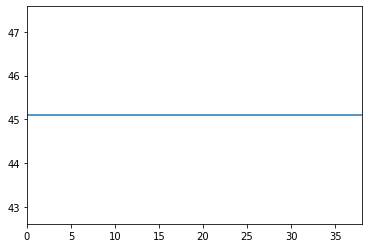

In [403]:

pd.Series(predictions).plot()

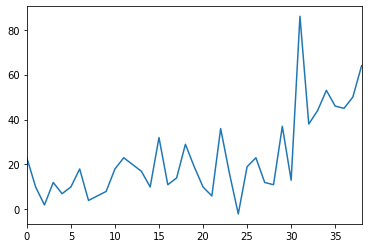

In [357]:
pd.Series(y_test.ravel()).plot()

In [404]:
svm_estimator.coef_[0]

array([-2.2,  0. ,  0. ,  3.3,  0. ,  0. ,  4.1,  0. ,  0. ,  2.9,  4.2,
        2.9,  0. ,  4.3,  0. ,  2.9,  0. , -2. ,  0. ,  4.3,  0. ,  0. ,
        0. ,  0. ,  0. ,  2.9,  0. ,  0. ,  4.2,  0. ,  3.3,  2.2,  2.2,
        2.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [405]:
#uk_measures_ = measures_.loc[measures_["country"] == 'United Kingdom']
ir_measures_ = measures_.loc[measures_["country"] == 'Ireland']

In [ ]:
pd.set_option('display.max_rows', None)
uk_measures_

In [406]:
measure_weights = svm_estimator.coef_[0]

In [ ]:
type(measure_weights)

In [ ]:
measure_weights

In [407]:
result = {}
for index, i in enumerate(measure_weights):
    print(index, i)
    temp_match = ir_measures_.loc[ir_measures_["measure_labels"] == (index + 1)]
    
    if not temp_match.empty:
        key = temp_match.iloc[0]["measure"]
        value = i
        result[key] = value

0 -2.2000000000000006
1 0.0
2 0.0
3 3.300000000000001
4 0.0
5 0.0
6 4.100000000000001
7 0.0
8 0.0
9 2.900000000000001
10 4.200000000000001
11 2.900000000000001
12 0.0
13 4.300000000000001
14 0.0
15 2.900000000000001
16 0.0
17 -1.9999999999999725
18 0.0
19 4.300000000000001
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 2.900000000000001
26 0.0
27 0.0
28 4.200000000000001
29 0.0
30 3.300000000000001
31 2.1999999999999997
32 2.1999999999999997
33 2.900000000000001
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0


In [408]:
result

{'Amendments to funeral and burial regulations': -2.2000000000000006,
 'Border closure\xa0': 3.300000000000001,
 'Closure of businesses and public services': 4.100000000000001,
 'Domestic travel restrictions': 2.900000000000001,
 'Economic measures': 4.200000000000001,
 'Emergency administrative structures activated or established': 2.900000000000001,
 'General recommendations': 4.300000000000001,
 'Humanitarian exemptions': 2.900000000000001,
 'Isolation and quarantine policies': -1.9999999999999725,
 'Limit public gatherings': 4.300000000000001,
 'Other public health measures enforced': 0.0,
 'Partial lockdown': 2.900000000000001,
 'Schools closure\xa0': 4.200000000000001,
 'Strengthening the public health system': 3.300000000000001,
 'Surveillance and monitoring': 2.1999999999999997,
 'Testing policy': 2.1999999999999997,
 'Visa restrictions': 2.900000000000001}

In [409]:
import json
json_result = json.dumps(result)

In [410]:
json_result

'{"Amendments to funeral and burial regulations": -2.2000000000000006, "Border closure\\u00a0": 3.300000000000001, "Closure of businesses and public services": 4.100000000000001, "Domestic travel restrictions": 2.900000000000001, "Economic measures": 4.200000000000001, "Emergency administrative structures activated or established": 2.900000000000001, "General recommendations": 4.300000000000001, "Humanitarian exemptions": 2.900000000000001, "Isolation and quarantine policies": -1.9999999999999725, "Limit public gatherings": 4.300000000000001, "Other public health measures enforced": 0.0, "Partial lockdown": 2.900000000000001, "Schools closure\\u00a0": 4.200000000000001, "Strengthening the public health system": 3.300000000000001, "Surveillance and monitoring": 2.1999999999999997, "Testing policy": 2.1999999999999997, "Visa restrictions": 2.900000000000001}'

In [411]:
with open('ir_policy_effectiveness.json', 'w') as json_file:
    json.dump(result, json_file)

In [ ]:
gc_res

In [ ]:
type(gc_res)

In [ ]:
gc_result = {}
for key in gc_res:
    key_ = "lag" + str(key)
    gc_result[key_] = (gc_res[key][0]['ssr_chi2test'][0], gc_res[key][0]['ssr_chi2test'][1])
    #print(gc_res[key][0]['ssr_chi2test'][0], gc_res[key][0]['ssr_chi2test'][1])

In [ ]:
gc_result

In [ ]:
with open('ir_policy_grangerstats.json', 'w') as json_file:
    json.dump(gc_result, json_file)

In [ ]:
gc_res

In [328]:

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [390]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [391]:
forest_pred = random_forest.predict(X_test)

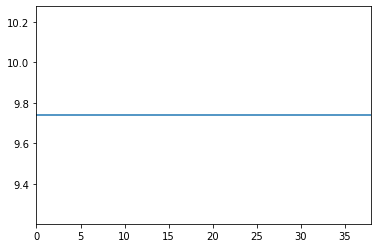

In [392]:
pd.Series(forest_pred).plot()

In [393]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [394]:
random_forest.feature_importances_

array([5.10114127e-01, 0.00000000e+00, 0.00000000e+00, 3.90713296e-02,
       0.00000000e+00, 0.00000000e+00, 1.21908473e-01, 0.00000000e+00,
       0.00000000e+00, 6.75761306e-05, 1.91066745e-01, 8.29074816e-05,
       0.00000000e+00, 4.29364790e-04, 0.00000000e+00, 7.99248259e-03,
       0.00000000e+00, 3.59514313e-03, 0.00000000e+00, 2.63896479e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.29336404e-04, 0.00000000e+00, 0.00000000e+00,
       5.83563565e-05, 0.00000000e+00, 4.42550100e-02, 3.16130467e-02,
       4.92258878e-02, 2.63187250e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [395]:
result = {}
for index, i in enumerate(random_forest.feature_importances_):
    print(index, i)
    temp_match = ir_measures_.loc[ir_measures_["measure_labels"] == (index + 1)]
    
    if not temp_match.empty:
        key = temp_match.iloc[0]["measure"]
        value = i
        result[key] = value

0 0.510114126634964
1 0.0
2 0.0
3 0.03907132955174234
4 0.0
5 0.0
6 0.12190847271409451
7 0.0
8 0.0
9 6.757613063644545e-05
10 0.19106674452583816
11 8.29074815736573e-05
12 0.0
13 0.00042936478957528325
14 0.0
15 0.007992482592021134
16 0.0
17 0.0035951431253103943
18 0.0
19 0.00026389647935161933
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.00022933640363281187
26 0.0
27 0.0
28 5.835635652480855e-05
29 0.0
30 0.04425501001708862
31 0.03161304672228054
32 0.04922588775038822
33 2.6318724977507587e-05
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0


In [396]:
result

{'Amendments to funeral and burial regulations': 0.510114126634964,
 'Border closure\xa0': 0.03907132955174234,
 'Closure of businesses and public services': 0.12190847271409451,
 'Domestic travel restrictions': 6.757613063644545e-05,
 'Economic measures': 0.19106674452583816,
 'Emergency administrative structures activated or established': 8.29074815736573e-05,
 'General recommendations': 0.00042936478957528325,
 'Humanitarian exemptions': 0.007992482592021134,
 'Isolation and quarantine policies': 0.0035951431253103943,
 'Limit public gatherings': 0.00026389647935161933,
 'Other public health measures enforced': 0.0,
 'Partial lockdown': 0.00022933640363281187,
 'Schools closure\xa0': 5.835635652480855e-05,
 'Strengthening the public health system': 0.04425501001708862,
 'Surveillance and monitoring': 0.03161304672228054,
 'Testing policy': 0.04922588775038822,
 'Visa restrictions': 2.6318724977507587e-05}

In [413]:
random_forest.score(X_test, y_test)

-0.514302324382568

In [425]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso #because of multicolinearity

In [426]:
linear_model = Lasso()
linear_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [427]:
linear_model.score(X_test, y_test)

-0.09583923770581905

In [432]:
linear_pred = linear_model.predict(X_test)

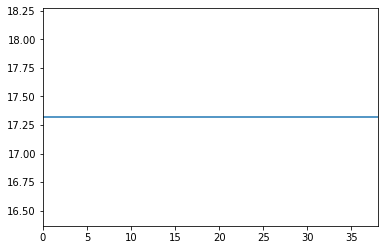

In [433]:
pd.Series(linear_pred).plot()

In [429]:
linear_res = linear_model.coef_

In [430]:
lin_result = {}
for index, i in enumerate(linear_model.coef_):
    print(index, i)
    temp_match = ir_measures_.loc[ir_measures_["measure_labels"] == (index + 1)]
    
    if not temp_match.empty:
        key = temp_match.iloc[0]["measure"]
        value = i
        lin_result[key] = value

0 -350.0144069925732
1 0.0
2 0.0
3 112.97164770961601
4 0.0
5 0.0
6 103.1998884886204
7 0.0
8 0.0
9 31.858933107328276
10 12.300996099528877
11 0.0
12 0.0
13 16.93471401054907
14 0.0
15 0.0
16 0.0
17 -40.28008694282674
18 0.0
19 7.459275359782847
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 7.073816288596106
31 111.90113847896087
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0


In [431]:
lin_result

{'Amendments to funeral and burial regulations': -350.0144069925732,
 'Border closure\xa0': 112.97164770961601,
 'Closure of businesses and public services': 103.1998884886204,
 'Domestic travel restrictions': 31.858933107328276,
 'Economic measures': 12.300996099528877,
 'Emergency administrative structures activated or established': 0.0,
 'General recommendations': 16.93471401054907,
 'Humanitarian exemptions': 0.0,
 'Isolation and quarantine policies': -40.28008694282674,
 'Limit public gatherings': 7.459275359782847,
 'Other public health measures enforced': 0.0,
 'Partial lockdown': 0.0,
 'Schools closure\xa0': 0.0,
 'Strengthening the public health system': 7.073816288596106,
 'Surveillance and monitoring': 111.90113847896087,
 'Testing policy': 0.0,
 'Visa restrictions': 0.0}

In [434]:
with open('ir_policy_effectiveness.json', 'w') as json_file:
    json.dump(lin_result, json_file)